# **Importing Pandas/Numpy/Seaborn/Matplotlib**

---


1.We will import pandas with `import` keyword

2.Pandas is a python package which consist mainly two data structure:
- Series
- DataFrame


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# **Loading Titanic_database csv file**

---



>Now we will load our Titanic database .csv file into a pandas DataFrame by using pandas `read_csv()` function.

>We will also look at first 5 rows of the database to have a look what type of data is actually present in which we need to analyze.
this can be achieved by `head()` method.

In [140]:
passengers=pd.read_csv('/content/Titanic database.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Description of the attributes of the dataset**

- PassengerId -> Unique passenger id
- Survived -> Survival(0=NO;1=YES)
- Pclass -> Passenger Class(1=1st class;2=2nd class;3=3rd class)
- Name -> name of the passenger
- Sex -> Male or Female
- Age -> age of passenger
- SibSp -> number of passenger's sibling/spouse Aboard 
- Parch -> number of passenger's parents/children Aboard 
- Ticket -> passenger's ticket no.
- Fare -> Passenger's fare(British pound)
- Cabin -> Passenger's cabin no.
- Embarked -> port of embarkation(C=Cherbourg; Q=Queenstown; S=Southampton)

# **1.Relation b/w Survived attribute and Pclass attribute**

---





>Here `c1s0`(class 1 survival 0) is a 2 dimentional pandas DataFrame in which we used boolean indexing such that `c1s0` has two columns `Pclass` and `Survived` and the contents i.e values in each row is any one of the
combination:`(True,True)`;`(True,False)`;`(False,True)`;`(False,False)`.

>Similarly just like `c1s0`  `c2s0` and `c3s0` are also 2 dimentional pandas DataFrame.

>`x1`,`x2`,`x2` are 1 dimentional panda series with multi indexes and consists only 4 rows in it bceause there are only 4 unique combination,so the multiindex are as follows: `(True,True)`;`(True,False)`;`(False,True)`;`(False,False)`.

In [3]:
c1s0=passengers[['Pclass','Survived']]==[1,0]
c2s0=passengers[['Pclass','Survived']]==[2,0]
c3s0=passengers[['Pclass','Survived']]==[3,0]
x1=c1s0.value_counts()
x2=c2s0.value_counts()
x3=c3s0.value_counts()
print('the number of people who died and belong to 1st class:',x1[(True,True)])
print('the number of people who died and belong to 2nd class:',x2[(True,True)])
print('the number of people who died and belong to 3rd class:',x3[(True,True)])

the number of people who died and belong to 1st class: 80
the number of people who died and belong to 2nd class: 97
the number of people who died and belong to 3rd class: 372


**CONCLUSION:**

>The number of people who died and belong to 3rd class is very more as compared to other classes i.e the died people percentage is greater in 3rd class.

> Hence as a conclusion we can say the 3rd class was not constructed well and hence  was more dangerous than other classes.







## **Data Visualization of Relation b/w Survived attribute and Pclass attribute**

> This can also be visualized using Bar garph with the help of seaborn's `countplot()` function. 

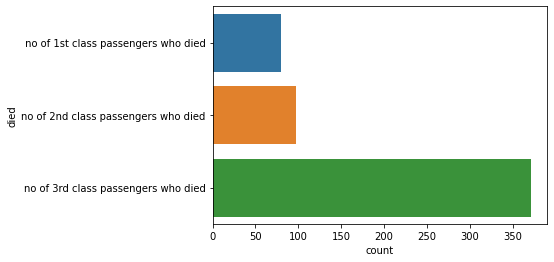

In [68]:
i1={'died':[' no of 1st class passengers who died']*x1[(True,True)]}
i2=[{'died':'no of 2nd class passengers who died'}]*x2[(True,True)]
i3=[{'died':'no of 3rd class passengers who died'}]*x3[(True,True)]
c1died=pd.DataFrame(i1)
c2died=pd.DataFrame(i2)
c3died=pd.DataFrame(i3)
yaxis=c1died.append(c2died).append(c3died)
sb.countplot(data=yaxis,y='died')

# **2.Relation b/w Survived attribute and Sex attribute**

---


> Here first we check for `NaN `values with the help of `isna()` function in combination with `sum()` function.

> Then we created two 2-dimentional Pandas DataFrame `sms0`(sex male survival 0) and `sfs0`(sex female survival 0) which contains True,False values i.e boolean values.

> the variable `ms`(male survival) and `fs`(female survival) are two 1-dimentional pandas Series contains 4 rows each with muti indexs as  `(True,True)`;`(True,False)`;`(False,True)`;`(False,False)`.



In [5]:
#first lets check that is there any Nan value in 'Sex' column
x=passengers[['Sex','Survived']]
if x.isna().sum()['Sex']==0:
  print('There is no NaN value')
else:
  print('Sex column contains unknown values other than male and female')
#Now lets analyse how many male died and how many female died.
sms0=passengers[['Sex','Survived']]==['male',0]
sfs0=passengers[['Sex','Survived']]==['female',0]
ms=sms0.value_counts()
fs=sfs0.value_counts()
print('The number of male that died are:',ms[(True,True)])
print('The number of female that died are:',fs[(True,True)])

There is no NaN value
The number of male that died are: 468
The number of female that died are: 81


**CONCLUSION:**

> The number of male who died was more than the number of female who died with a huge difference.

>Hence as a conclusion we can say male were more prone to death as compared to female.

## **Data Visualization of Relation b/w Survived attribute and Sex attribute**

> This can also be visualized using Bar garph with the help of seaborn's `countplot()` function. 

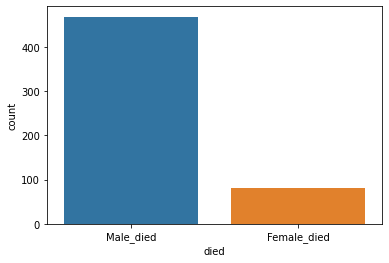

In [9]:
item1={'died':['Male_died']*ms[(True,True)]}
item2=[{'died':'Female_died'}]*fs[(True,True)]
md=pd.DataFrame(item1)
fd=pd.DataFrame(item2)
xaxis=md.append(fd)
sb.countplot(data=xaxis,x='died')

# **3.Relation b/w Survived attribute, SibSp attribute and Parch attribute**

---




> `new_df` is a new dataframe with columns `'SibSp','Parch','Survived'` which consist values either` True` or `False` in each column.

> if for column `'SibSp','Parch','Survived'` the value is `True,True,True` respectively then he /she is alone and did not survived,similary if values are `False,False,True` respecively then  he /she is not alone and did not survived

In [65]:
new_df=passengers[['SibSp','Parch','Survived']]==[0,0,0]
alonedied=(new_df.value_counts())[(True,True,True)]
notalonedied=(new_df.value_counts())[(False,False,True)]
print('people who were alone and are dead:',alonedied)
print('People who were with someone and are dead:',notalonedied)

people who were alone and are dead: 374
People who were with someone and are dead: 80


**CONCLUSION:**

> People who were travelling alone and died are more than the people who were travelling with someone and died.

> Hence as a conclusion we can say alone people were more prone to death rather than travelling with family.

## **Data Visualization of Relation b/w Survived attribute, SibSp attribute and Parch attribute**

> This can also be visualized using Pie chart with the help of matplotlib's `pie()` function and to display the pie chat we use `show()` function.




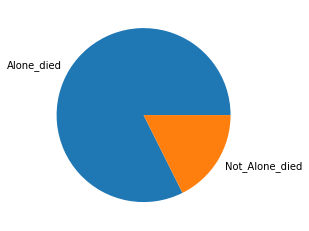

In [67]:
visual=pd.Series(index=['Alone_died','Not_Alone_died'],data=[alonedied,notalonedied])
plt.pie(visual,labels=visual.index)
plt.show()

# **4.Relation b/w Pclass attribute and Fare attribute**

---


> `c1f `(class 1 fare) is a 2 dimentional pandas DataFrame in which we have droped i.e deleted all the rows whose `'Pclass'` value is either 2 or 3,hence only those rows are there whose `'Pclass'` value is 1

> Similarly `c2f` and `c3f` are 2 dimentional pandas DataFramein which only those rows are there whose `'Pclass'` value is 2 and 3 respectively.


In [170]:
new=passengers[['Pclass','Fare']]
indx1=new[(new['Pclass']==3) | (new['Pclass']==2)].index
c1f=new.drop(indx1)#dropped /delete all the rows that contain 'Pclass' equal to 3 or 2
print('The average fare of 1st class passengers is:'+str(c1f['Fare'].sum()/c1f.shape[0])+' pound')

indx2=new[(new['Pclass']==1) | (new['Pclass']==3)].index
c2f=new.drop(indx2)#dropped /delete all the rows that contain 'Pclass' equal to 1 or 3
print('The average fare of 2nd class passengers is:'+str(c2f['Fare'].sum()/c2f.shape[0])+' pound')

indx3=new[(new['Pclass']==1) | (new['Pclass']==2)].index
c3f=new.drop(indx3)#dropped /delete all the rows that contain 'Pclass' equal to 1 or 2
print('The average fare of 3rd class passengers is:'+str(c3f['Fare'].sum()/c3f.shape[0])+' pound')


The average fare of 1st class passengers is:84.1546875 pound
The average fare of 2nd class passengers is:20.662183152173913 pound
The average fare of 3rd class passengers is:13.675550101832993 pound


**CONCLUSION:**

> The average fare of 1st class passengers is very expensive as compared to 2ndclass and 3rd class.whereas,2nd class average fare and 3rd class average fare was very close to each other and also very cheap.

> Hence as a conclusion 1st class passengers were very rich.





## **Data Visualization of Relation b/w Pclass attribute and Fare attribute**

> This can also be visualized using Pie chart with the help of matplotlib's `pie()` function and to display the pie chat we use `show()` function.`colors` parameter is also used to set different colors for different labels.



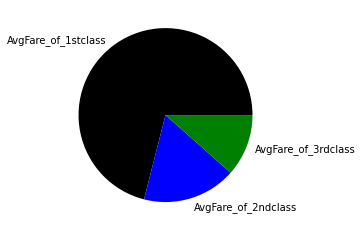

In [175]:
new_series=pd.Series([c1f['Fare'].sum()/c1f.shape[0],c2f['Fare'].sum()/c2f.shape[0],c3f['Fare'].sum()/c3f.shape[0]])
new_series.index=['AvgFare_of_1stclass','AvgFare_of_2ndclass','AvgFare_of_3rdclass']
plt.pie(new_series,labels=new_series.index,colors=['black','blue','green'])
plt.show()

# **5.Relation b/w Survived attribute and Age attribute**

---

> First we eliminate all rows from `df` which contains `NaN`values and created dfnew then we eliminated all rows which has `'Survived'` value as 1.

>After elimination of all passengers who lived we then eliminated all rows whose `'Age'` is gerater than equal to 18 to find how many young people died with the help of `age_0_18` variable

>Similarly,from `dfnew` we eliminated all rows whose `'Age'` is between the range [18,60) to find how many mature people died with `age_18_60` variable

> Similarly,from `dfnew` we eliminated all rows whose `'Age'` is greater than equal to 60 to find how many Senior passengers died with `age_60ab` variable


In [169]:
df=passengers[['Survived','Age']]
dfnew=df.dropna(axis=0)#dropped /delete all the rows that contain 'Age' value as NaN
dfnew=dfnew.drop(dfnew[dfnew['Survived']==1].index)

age_0_18=dfnew.drop(dfnew[dfnew['Age']>=18.0].index)#dropped /delete all the rows that contain 'Age' greater than equal to 18
print('The number of passengers whose age<18 and died in accident are:',age_0_18.shape[0])

age_18_60=dfnew.drop(dfnew[dfnew['Age']<18.0].index)#dropped /delete all the rows that contain 'Age' less than 18
age_18_60=dfnew.drop(dfnew[dfnew['Age']>=60.0].index)#dropped /delete all the rows that contain 'Age' greater than equal to 60
print('The number of passengers whose 18<=age<60 and died in accident are:',age_18_60.shape[0])

age_60ab=dfnew.drop(dfnew[dfnew['Age']<60.0].index)#dropped /delete all the rows that contain 'Age' less than 60
print('The number of passengers whose age>=60 and died in accident are:',age_60ab.shape[0])


The number of passengers whose age<18 and died in accident are: 52
The number of passengers whose 18<=age<60 and died in accident are: 405
The number of passengers whose age>=60 and died in accident are: 19


**CONCLUSION:**


> Mature passengers(Age>=18 and Age<60) died more than other age group passengers.

> Hence as a conclusion young passengers(Age<18 ) and Senior passengers(Age>=60)  were more safe.





## **Data Visualization of Relation b/w Age attribute and Survived attribute**

> This can also be visualized using Pie chart with the help of matplotlib's `pie()` function and to display the pie chat we use `show()` function.`colors` parameter is also used to set different colors for different labels.



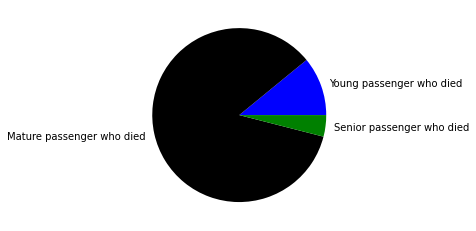

In [174]:
ageseries=pd.Series([age_0_18.shape[0],age_18_60.shape[0],age_60ab.shape[0]])
ageseries.index=['Young passenger who died','Mature passenger who died','Senior passenger who died']
plt.pie(ageseries,labels=ageseries.index,colors=['blue','black','green'])
plt.show()

# **FINAL CONCLUSION**

---
*  The number of people who died and belong to 3rd class is very more as compared to other classes i.e the died people percentage is greater in 3rd class.

*  The number of male who died was more than the number of female who died with a huge difference.

* People who were travelling alone and died are more than the people who were travelling with someone and died.

*  The average fare of 1st class passengers is very expensive as compared to 2ndclass and 3rd class.whereas,2nd class average fare and 3rd class average fare was very close to each other and also very cheap.

* Mature passengers(Age>=18 and Age<60) died more than other age group passengers.









